In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
len(df['Id'].unique()) # we have given reocrd of 35 unique users

35

In [ ]:
df.info() # there is no null value in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [10]:
df.duplicated().sum() # there is no duplicate value in the dataset

np.int64(0)

In [ ]:
df.describe() 

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


Based on the observations made:

No typographical errors, null, or missing values were found in the dataset.
The dataframe consists of 940 rows and 15 columns.
The ActivityDate column is erroneously classified as object dtype and should be converted to datetime64 dtype for consistency and ease of manipulation.
An unexpected discrepancy was found in the number of unique IDs, with 33 unique IDs instead of the expected 30. This deviation warrants further investigation to understand the underlying reasons for the disparity.
The specified data manipulations are carried out as follows:

The ActivityDate column is converted to datetime64 dtype using the pd.to_datetime() function in Pandas.

The format of the ActivityDate column is standardized to yyyy-mm-dd.

A new column named DayOfTheWeek is created by extracting the day of the week from the ActivityDate column for further analysis.

A new column named TotalMins is created, representing the sum of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and SedentaryMinutes.

Another new column named TotalHours is created by converting the TotalMins column (in minutes) to the number of hours.

Columns are rearranged and renamed as per the specified requirements.

The ActivityDate column will be transformed from its current datatype of object to datetime64 using the pd.to_datetime() function.
Subsequently, the format of the ActivityDate column will be standardized to yyyy-mm-dd.
After performing these transformations, we will confirm the changes by printing the head of the dataframe to ensure that the ActivityDate column has indeed been updated to datetime64 dtype and that the dates have been formatted to yyyy-mm-dd.

In [12]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [ ]:
# Conversion of 'ActivityDate' to datetime format
import datetime as dt 
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format='%m/%d/%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

In [14]:
# day  of the week from activity date
df['day_of_week'] = df['ActivityDate'].dt.day_name()
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday


In [15]:
df['Total_Mins'] = df['SedentaryMinutes'] + df['LightlyActiveMinutes'] + df['FairlyActiveMinutes'] + df['VeryActiveMinutes']
df['Total_Mins'] = df['Total_Mins'].astype(int)
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week,Total_Mins
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,1054
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday,968
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday,934
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday,1363
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday,1062


In [16]:
df['TotaalHours'] = df['Total_Mins'] / 60
df['TotaalHours'] = df['TotaalHours'].astype(int)

Excellent! With the completion of data cleaning and manipulation, the dataset is now prepared and primed for analysis. You can proceed confidently with your analytical endeavors knowing that the data is accurate, consistent, and formatted appropriately. If you have any further questions or need assistance with your analysis, feel free to ask. Happy analyzing!

In [17]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week,Total_Mins,TotaalHours
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,1054,17
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,Saturday,968,16
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,Sunday,934,15
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,Monday,1363,22
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,Tuesday,1062,17


Ananlyze

In [18]:
df.describe() # we have 940 observations and 15 columns

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Mins,TotaalHours
count,4.570000e+02,457,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,2016-04-04 04:40:26.258205696,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954,1195.045952,19.689278
min,1.503960e+09,2016-03-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000,41.000000,0.000000
25%,2.347168e+09,2016-04-02 00:00:00,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000,985.000000,16.000000
50%,4.057193e+09,2016-04-05 00:00:00,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000,1440.000000,24.000000
75%,6.391747e+09,2016-04-08 00:00:00,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000,1440.000000,24.000000
max,8.877689e+09,2016-04-12 00:00:00,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000,1440.000000,24.000000
std,2.293781e+09,NaN,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523,306.457382,5.284842


Based on the statistical findings:

The average number of steps logged by users is 7,637, equivalent to approximately 5.4 kilometers. This falls short of the recommended 10,000 steps or 8 kilometers per day suggested by the CDC for optimal health, weight management, and fitness improvement (Source: Medical News Today article).

Sedentary behavior appears to be prevalent among users, with an average of 991 minutes, or approximately 20 hours, logged as sedentary activity. This comprises 81% of the total average minutes logged.

The average calories burned is calculated to be 2,303 calories, equivalent to approximately 0.6 pounds. It's important to note that the interpretation of calorie burn may vary significantly based on individual factors such as age, weight, daily activities, exercise regimen, hormonal balance, and daily calorie intake (Source: Health Line article).

These findings highlight areas where users may need encouragement or interventions to increase physical activity levels and promote overall health and well-being.

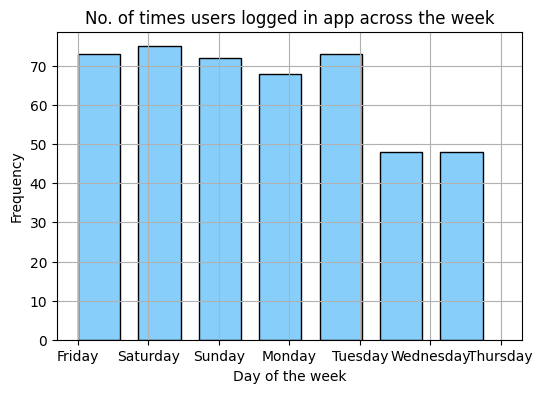

In [23]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df['day_of_week'], bins = 7, 
         width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

Frequency of Usage Across the Week
In this histogram, we examine the frequency of FitBit app usage categorized by days of the week.

Analysis reveals a notable concentration of user activity tracking within the midweek period, particularly from Tuesday to Friday.

Interestingly, there is a decline in usage frequency observed on Fridays, which persists throughout the weekend and into Monday.

This pattern suggests a potential trend in user engagement with the FitBit app, with heightened activity tracking during weekdays compared to weekends.

In [25]:
df.head(1)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day_of_week,Total_Mins,TotaalHours
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,Friday,1054,17


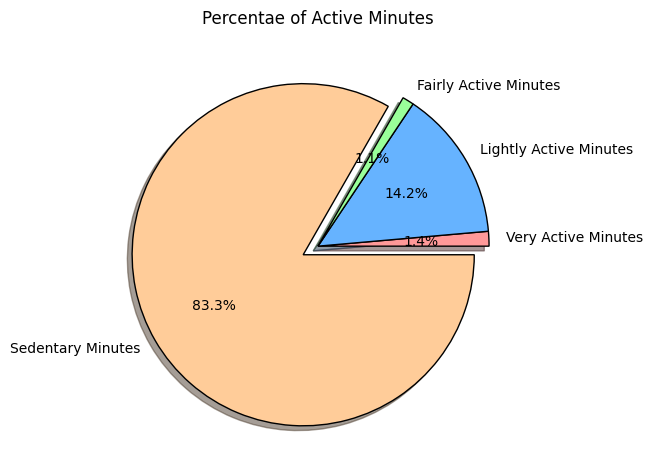

In [29]:
very_active_mins = df['VeryActiveMinutes'].sum()
lightly_active_mins = df['LightlyActiveMinutes'].sum()
fairly_active_mins = df['FairlyActiveMinutes'].sum()
sedentary_mins = df['SedentaryMinutes'].sum()  

slices = [very_active_mins, lightly_active_mins, fairly_active_mins, sedentary_mins]
labels = ['Very Active Minutes', 'Lightly Active Minutes', 'Fairly Active Minutes', 'Sedentary Minutes']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0, 0, 0, 0.1)  # explode the first slice (Very Active Minutes)
plt.style.use("default")
plt.pie(slices, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True,wedgeprops = {"edgecolor": "black"})
plt.title('Percentae of Active Minutes')
plt.tight_layout()
plt.show()

Proportion of Activity in Minutes

As observed from the pie chart:

Sedentary minutes comprise the largest proportion at 81.3%.

This suggests that users primarily utilize the FitBit app to log routine daily activities such as commuting, sedentary movements (e.g., shifting from one location to another), or completing errands.

The app is infrequently employed for tracking fitness activities such as running, as evidenced by the minor percentages of fairly active activity (1.1%) and very active activity (1.7%). This trend is concerning, considering that the FitBit app is designed to promote and facilitate fitness endeavors.

In [ ]:
df_steps = df[df['TotalSteps'] > 10000]


(457, 18)

In [49]:
# Count of days each user has more than 10,000 steps
dist10K = df_steps.groupby('Id').agg({'TotalSteps': 'count'}).rename(columns={'TotalSteps': 'DaysOver10kSteps'})

In [50]:
dist_t  = df.groupby('Id').agg({'TotalSteps': 'count'}).rename(columns={'TotalSteps': 'overall_dist'}) 

Text(0.5, 1.0, 'Percentage of Days with More than 10,000 Steps per User')

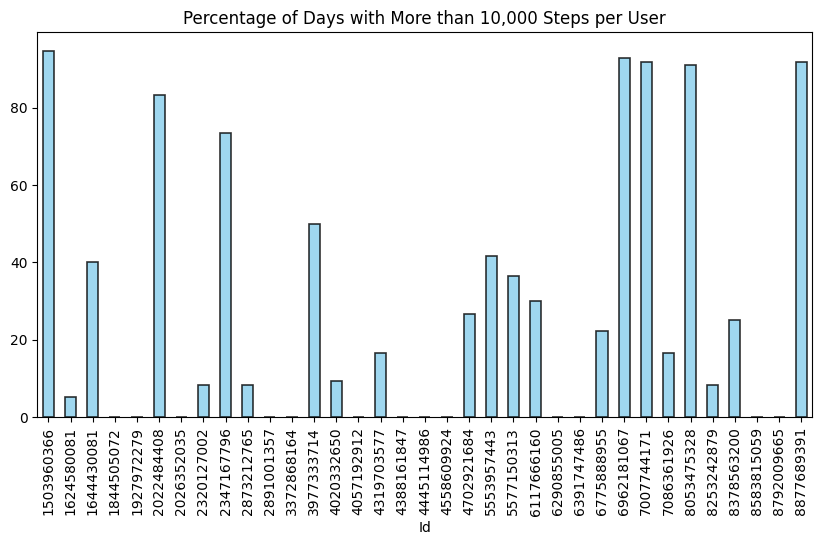

In [59]:
((dist10K['DaysOver10kSteps'] / dist_t['overall_dist'] )* 100).plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black', linewidth=1.2, alpha=0.8)
plt.title('Percentage of Days with More than 10,000 Steps per User')

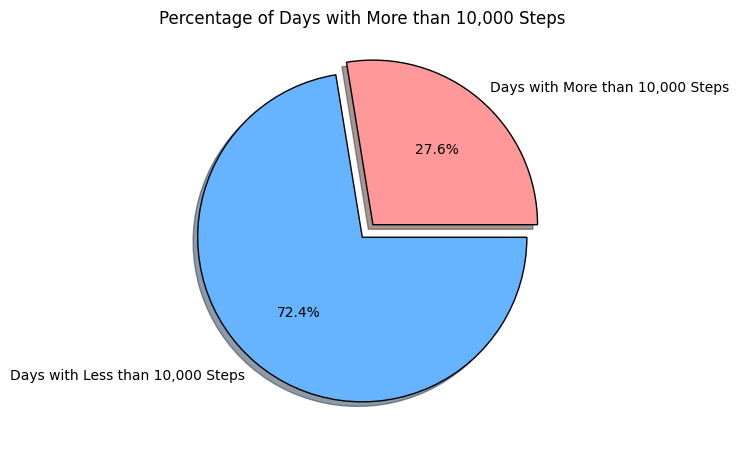

In [ ]:
dist_over10K= df_steps.groupby('Id').agg({'TotalSteps': 'count'}).rename(columns={'TotalSteps': 'DaysOver10kSteps'}).sum()
overall_steps = df['TotalSteps'].value_counts()

slices = [dist_over10K['DaysOver10kSteps'], overall_steps.sum() - dist_over10K['DaysOver10kSteps']]
labels = ['Days with More than 10,000 Steps', 'Days with Less than 10,000 Steps']
colors = ['#ff9999', '#66b3ff']
explode = (0.1,0)  # explode the first slice (Very Active Minutes)
plt.style.use("default")
plt.pie(slices, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True,wedgeprops = {"edgecolor": "black"})
plt.title('Percentage of Days with More than 10,000 Steps')
plt.tight_layout()
plt.show()


The analysis of the Fitbit activity data reveals several key insights:

1. Most users do not meet the recommended daily step goal of 10,000 steps, with only about 28% of days surpassing this threshold.
2. Sedentary behavior is highly prevalent, accounting for over 80% of total logged minutes, indicating a need for increased physical activity.
3. User engagement with the app is higher during weekdays, with a noticeable decline on weekends.
4. The majority of activity logged is light or sedentary, with very little time spent in fairly or very active states.

These findings suggest opportunities for targeted interventions to encourage more consistent and vigorous physical activity among users, especially on weekends and for those with predominantly sedentary routines.
""")